In [1]:
import scipy as sc
import numpy as np
import scipy.stats as sct
sc.version.full_version 
import matplotlib.pyplot as plt

#b. Find P(X>=50)
# loc = mean
# Scale = standard deviation
# sct.norm.sf(x=10,loc=0,scale=1)
sct.norm.isf(q=0,loc=0,scale=1)

inf

In [2]:
def ROC_Curve(alp):
    s0=1
    s1=2
    N=1000
    chisqu_alpha=sct.chi2.ppf(q=1-alp,df=N)
    Pd=1-sct.gamma.cdf(x=chisqu_alpha,a=N/2,scale=2*((s1*s1)/(s0*s0)))
    return Pd

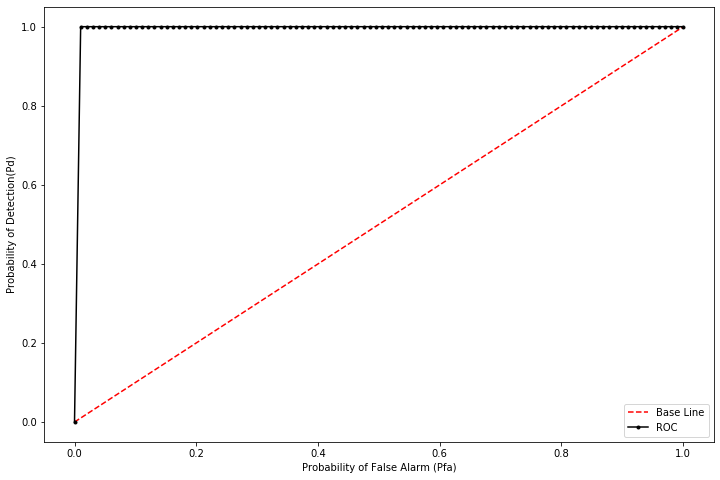

In [3]:
k=np.linspace(0,1,100)
# ROC =Receiver Operating Statistics
ans=[]
for i in k:
    ans.append(ROC_Curve(i))
plt.figure(figsize=(12,8))    
plt.plot(k,k,label='Base Line',c='r',linestyle='dashed')
plt.plot(k,ans,label='ROC',c='k',marker='.')
plt.xlabel("Probability of False Alarm (Pfa)")
plt.ylabel("Probability of Detection(Pd)")
plt.legend()
plt.show()

In [4]:
s0=1
s1=2
# Number of samples
N=1000
alp=0.3
chisqu_alpha=sct.chi2.ppf(q=1-alp,df=N)
print("X^2(N,alpha)=",chisqu_alpha)
Pd=1-sct.gamma.cdf(x=chisqu_alpha,a=N/2,scale=2*((s1*s1)/(s0*s0)))
print("Probability of detection(Pd)=",Pd)

X^2(N,alpha)= 1022.9598734718893
Probability of detection(Pd)= 1.0


In [5]:
# Testing a sample
print(Pd)
print(alp)
mu=0
sigma=2
N=1000
samples= np.random.normal(mu, sigma, N)
# print(samples)
test_statistic=np.sum(np.square(samples))/(s0*s0)
print(test_statistic)
# samples*samples
if(test_statistic>=chisqu_alpha):
    print("Accept Alternate Hypothesis H1")
    print("Most Probably belongs to Standard Deviation s1 =",s1)
else:
    print("Accept Null Hypothesis H0")
    print("Most Probably belongs to Standard Deviation s0 =",s0)

1.0
0.3
3814.087438239313
Accept Alternate Hypothesis H1
Most Probably belongs to Standard Deviation s1 = 2


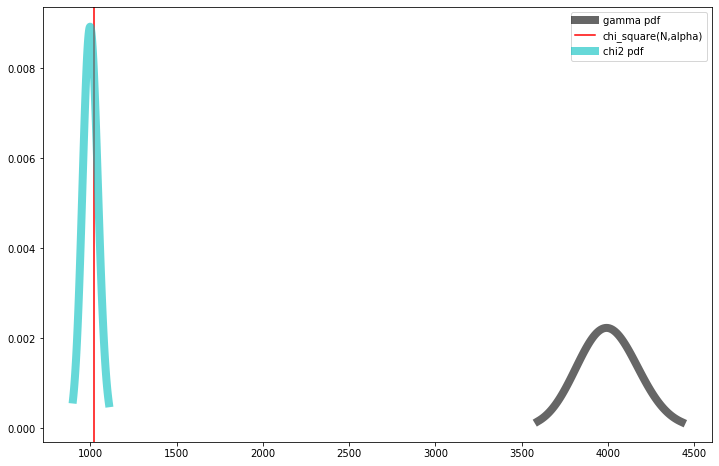

In [6]:
plt.figure(figsize=(12,8))
x = np.linspace(sct.gamma.ppf(0.01,a=N/2,scale=2*((s1*s1)/(s0*s0))),sct.gamma.ppf(0.99,a=N/2,scale=2*((s1*s1)/(s0*s0))),100)
plt.plot(x, sct.gamma.pdf(x, a=N/2,scale=2*((s1*s1)/(s0*s0))), 'k-', lw=8, alpha=0.6, label='gamma pdf')
plt.axvline(x=chisqu_alpha,c='r',label="chi_square(N,alpha)")
y = np.linspace(sct.chi2.ppf(0.01,df=N),sct.chi2.ppf(0.99,df=N),100)
plt.plot(y, sct.chi2.pdf(y,df=N),'c-', lw=8, alpha=0.6, label='chi2 pdf')
plt.legend()